In [1]:
# Step 1: Loading and Preprocessing the Image Data

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
# Use this cell if u have not downloaded the dataset else you below cell


# # Load the Fashion MNIST dataset
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# # Normalize the images to the range [0, 1]
# x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
# x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# # One-hot encode the labels
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
train_csv_path = 'Dataset/Fashion MNIST/fashion-mnist_train.csv'
test_csv_path  = 'Dataset/Fashion MNIST/fashion-mnist_test.csv'

In [6]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [7]:
x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

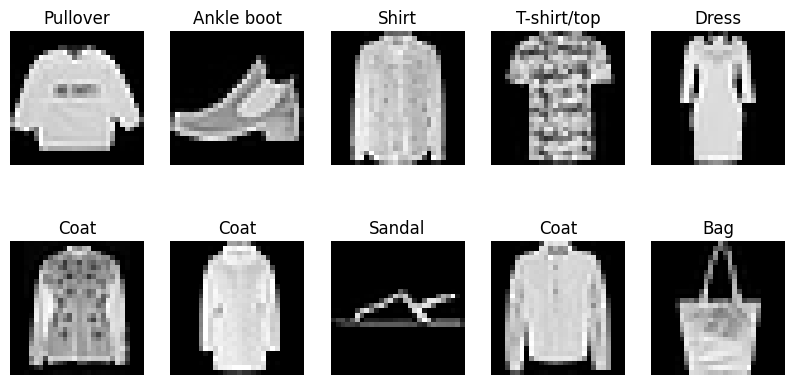

In [12]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()

In [ ]:
# Step 2: Defining the Model’s Architecture

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 26, 26, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 13, 13, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 11, 11, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 5, 5, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 3, 3, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 576)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 64)            │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │          650 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 3: Training the Model

In [16]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6951 - loss: 0.8419 - val_accuracy: 0.8482 - val_loss: 0.4273
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8550 - loss: 0.3970 - val_accuracy: 0.8778 - val_loss: 0.3422
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8817 - loss: 0.3298 - val_accuracy: 0.8828 - val_loss: 0.3224
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8925 - loss: 0.2899 - val_accuracy: 0.8966 - val_loss: 0.2886
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9026 - loss: 0.2651 - val_accuracy: 0.9007 - val_loss: 0.2758


In [ ]:
# Step 4: Estimating the Model’s Performance

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 - 2s - 5ms/step - accuracy: 0.9041 - loss: 0.2612

Test Accuracy: 0.9041


In [18]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
true_classes = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.88      0.81      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.74      0.73      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



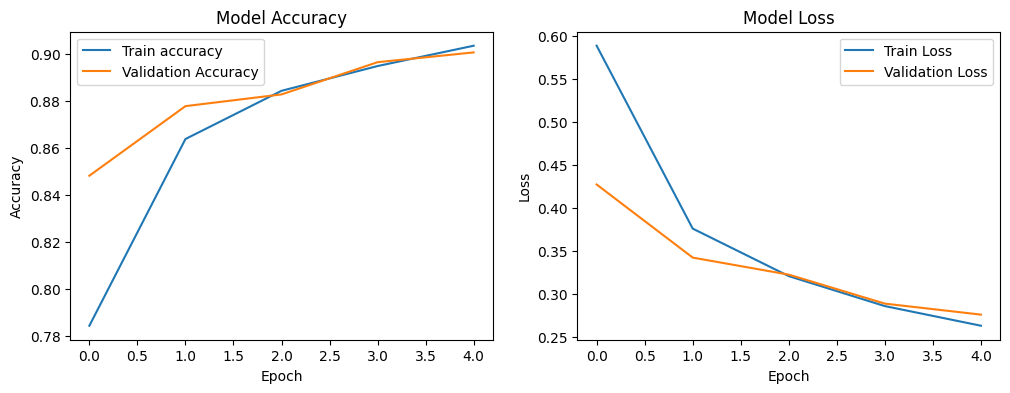

In [20]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()


# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

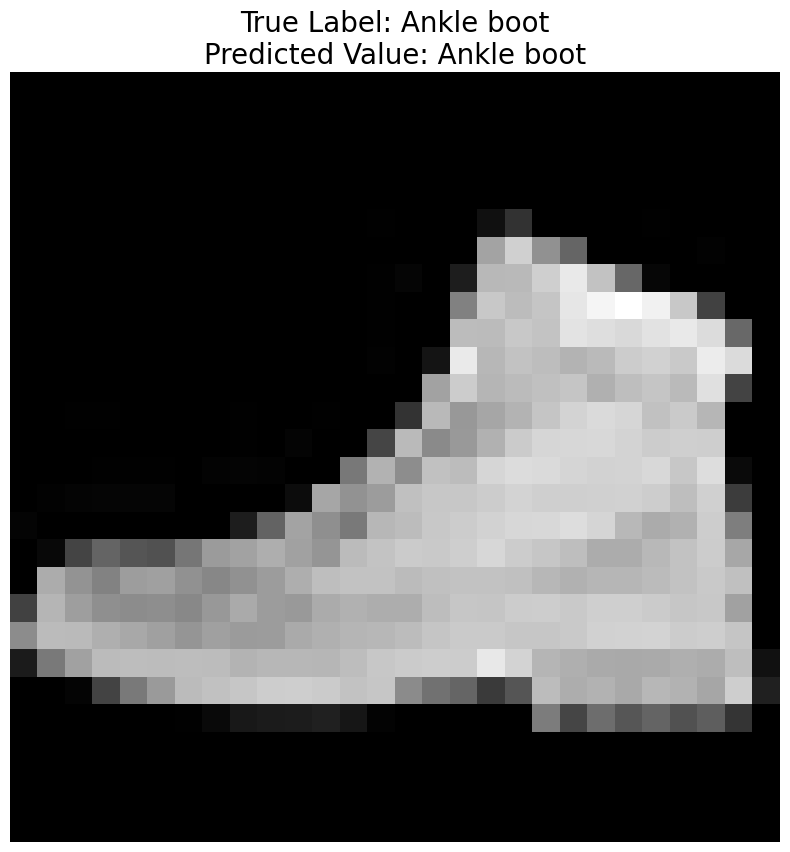

In [23]:
index = 80

true_label = class_names[true_classes[index]]
predicted_label = class_names[predicted_classes[index]]

plt.figure(figsize=[10, 10])
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}\nPredicted Value: {predicted_label}", size=20)
plt.axis('off')
plt.show()